## Data Understanding and Data Visulization

In [1]:
# Dependencies and setup
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import rcParams
import warnings
warnings.filterwarnings("ignore")

In [2]:
#setting background of figure 
plt.style.use('ggplot')
#Set Fonts/Plot Style
rcParams['figure.figsize'] = [15.0, 10.0]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 100
rcParams['font.size'] = 20
rcParams['legend.fontsize'] = 'large'
rcParams['figure.titlesize'] = 'medium'
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['xtick.major.size'] = 10
rcParams['ytick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True

In [3]:
# Reading the cleaned saved data 
rent_df=pd.read_csv('Resources/Cleaned_data/cleaned_rent_data.csv')

In [4]:
#Looking top rows
rent_df.head()

,name,dob,houseID,houseZip,paymentDate,paymentAmount,rentAmount,age
0,Karima Germany,1951-05-23,1192,92154,2011-11-01,1321.0,1321.0,71
1,Agustina Spargo,1900-01-01,21,92111,2011-09-06,2289.0,2289.0,122
2,Lucilla Broderick,1900-01-01,1474,92159,2011-11-01,1439.0,1439.0,122
3,Russ Mchale,1977-04-20,2015,92137,2012-07-01,1744.0,1744.0,45
4,Carmelita Ritzer,1969-03-09,311,92136,2011-02-01,1471.0,1471.0,53


In [5]:
rent_df['dob']=pd.to_datetime(rent_df['dob']).dt.date
rent_df['paymentDate']=pd.to_datetime(rent_df['paymentDate']).dt.date

## Data Understanding

## What’s the relation between those fields?
1. Can one person live in more than one address? And vice versa?



In [6]:
#total unique names
name=rent_df.name.nunique()
name

1989

In [7]:
#total unique houses
tot_house=rent_df.houseID.nunique()
tot_house

2475

In [8]:
# Grouping by name and date of birth to see how many person live in different address
same_person=rent_df.groupby(["name", 'dob']).agg({'houseID': 'nunique',
                                                'paymentAmount': lambda x : x.unique(),
                                                'rentAmount': 'nunique'}).reset_index()
same_person

,name,dob,houseID,paymentAmount,rentAmount
0,Aaron Huston,1900-01-01,1,1720.0,1
1,Abbey Kluth,1900-01-01,1,"[2023.0, 1861.0, 1780.0, 1619.0]",1
2,Abe Prophet,2014-02-08,1,"[1143.0, -171.45]",1
3,Abel Emmett,1974-01-17,1,1802.0,1
4,Abraham Maggi,1900-01-01,1,"[1269.0, 1395.0]",1
...,...,...,...,...,...
1984,Zofia Knoles,1999-12-17,2,"[1495.0, 0.0, 1792.0]",2
1985,Zoila Buth,1960-11-18,1,825.0,1
1986,Zoila Faler,1966-11-20,1,1396.0,1
1987,Zola Howley,1984-02-04,2,"[1021.0, 1497.0, 0.0]",2


In [9]:
# Filtering person living in more than one address using houseID
diff_house=same_person[same_person['houseID']>1]
diff_house

,name,dob,houseID,paymentAmount,rentAmount
6,Adaline Santos,1986-08-22,4,"[1279.0, 1446.0, 948.0, 1531.0, 0.0]",4
9,Adeline Hodgkinson,1900-01-01,2,"[0.0, 1241.0, 1720.0, 1365.0, 1892.0]",2
12,Agatha Brindley,1986-05-06,2,"[1059.0, 0.0, 1718.0, -158.85]",2
19,Aida Kittel,1972-11-03,2,"[875.0, -119.4, 2477.0, 915.0, 796.0, 995.0, 2...",2
24,Alba Resnick,1983-09-07,2,"[666.0, 732.0, 1585.0]",2
...,...,...,...,...,...
1970,Yevette Vickers,1900-01-01,2,"[1180.0, 1693.0]",2
1973,Yolanda Cowboy,1900-01-01,2,"[1223.0, 1557.0, -183.45, 1416.0, 1345.0]",2
1976,Yuki Uhler,1962-08-19,2,"[1482.0, 2172.0]",2
1984,Zofia Knoles,1999-12-17,2,"[1495.0, 0.0, 1792.0]",2


## 392 people have multiple address with Adaline Santos with 4 different address
#### Under the assumption that if the person dob is missing(1900-01-01) then considering the same person with this dob

In [10]:
# Filtering the person with missing date of birth
house=diff_house.loc[diff_house["dob"].apply(lambda x : x.year)!=1900]
house

,name,dob,houseID,paymentAmount,rentAmount
6,Adaline Santos,1986-08-22,4,"[1279.0, 1446.0, 948.0, 1531.0, 0.0]",4
12,Agatha Brindley,1986-05-06,2,"[1059.0, 0.0, 1718.0, -158.85]",2
19,Aida Kittel,1972-11-03,2,"[875.0, -119.4, 2477.0, 915.0, 796.0, 995.0, 2...",2
24,Alba Resnick,1983-09-07,2,"[666.0, 732.0, 1585.0]",2
32,Alethia Klick,1968-04-06,2,"[1187.0, 1857.0]",2
...,...,...,...,...,...
1962,Xiomara Mcnabb,1968-01-20,2,"[1227.0, 1970.0, 2167.0, 1349.0, 0.0]",2
1967,Yer Avey,1981-08-05,2,"[1308.0, 1009.0, -196.2, 0.0]",2
1976,Yuki Uhler,1962-08-19,2,"[1482.0, 2172.0]",2
1984,Zofia Knoles,1999-12-17,2,"[1495.0, 0.0, 1792.0]",2


## 207 people have multiple address with Adaline Santos with 4 different address (Identified using both name and date of birth)


In [11]:
# Arranging the top 20 person with maximum address 
top=house.nlargest(20, 'houseID')
top.sort_values('houseID', inplace=True)


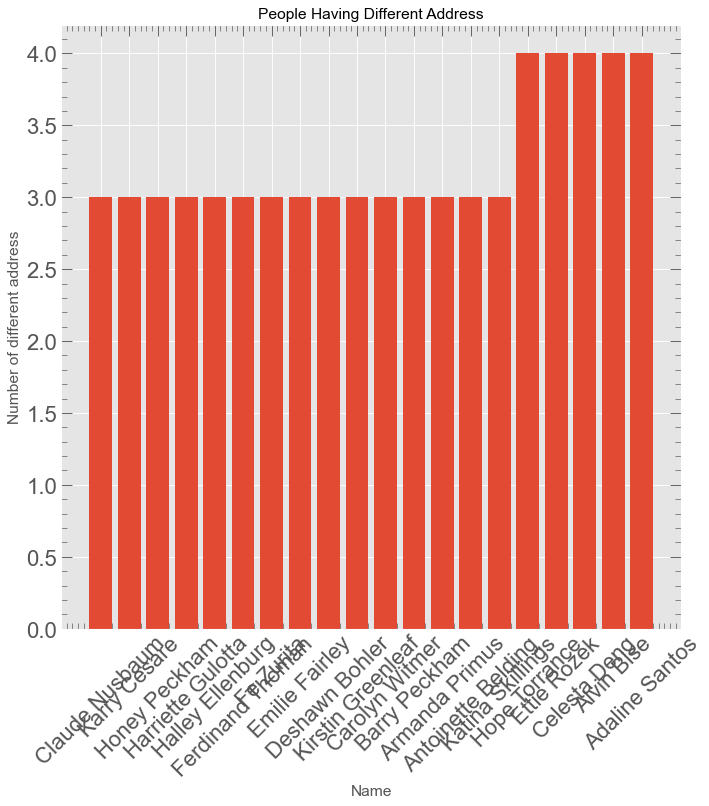

In [12]:
#Bar plot of person having different address
fig, ax = plt.subplots(figsize = (10,10))
ax.bar(top['name'],top['houseID'])
ax.set_xlabel("Name", size = 14)
ax.set_ylabel("Number of different address", size = 14)
ax.set_title("People Having Different Address", size = 14)
plt.xticks(rotation = 45)
plt.show()


## What’s the relation between those fields?
2. Can one address have more than one person.


In [13]:
h_rent=rent_df.groupby(["houseID"]).agg({'name': 'nunique',
                        'paymentDate': lambda x : x.unique(),
                        'paymentAmount': 'nunique',
                        'rentAmount': 'nunique'}).reset_index()
h_rent

,houseID,name,paymentDate,paymentAmount,rentAmount
0,1,1,"[2012-04-01, 2010-07-01, 2011-03-01, 2011-12-0...",1,1
1,2,1,"[2010-11-09, 2011-07-17, 2011-02-13, 2011-11-0...",4,1
2,3,1,"[2011-09-01, 2011-04-01, 2011-03-01, 2012-07-0...",1,1
3,4,1,"[2011-02-02, 2011-07-01, 2010-09-01, 2011-11-0...",2,1
4,5,1,"[2011-05-05, 2011-01-01, 2011-09-11, 2010-04-0...",2,1
...,...,...,...,...,...
2470,2471,1,"[2011-10-01, 2010-03-01, 2011-06-01, 2011-03-0...",1,1
2471,2472,1,"[2011-12-01, 2010-06-01, 2011-03-01, 2011-10-0...",1,1
2472,2473,1,"[2010-10-01, 2010-07-01, 2010-04-01, 2011-01-0...",1,1
2473,2474,1,"[2011-08-01, 2011-04-01, 2011-11-01, 2012-03-0...",2,1


In [14]:
h_rent.name.value_counts()

1    2475
Name: name, dtype: int64

## No one address has more than one person

## What’s the relation between those fields?
2. Can one address have different amount of rent? Payment?


In [15]:
diff_rent=rent_df.groupby(["houseID"]).agg({'name': lambda x : x.unique(),'paymentDate': lambda x : x.unique(),
                        'paymentAmount': 'nunique',
                        'rentAmount': 'nunique'}).reset_index()
diff_rent

,houseID,name,paymentDate,paymentAmount,rentAmount
0,1,Aaron Huston,"[2012-04-01, 2010-07-01, 2011-03-01, 2011-12-0...",1,1
1,2,Abbey Kluth,"[2010-11-09, 2011-07-17, 2011-02-13, 2011-11-0...",4,1
2,3,Abel Emmett,"[2011-09-01, 2011-04-01, 2011-03-01, 2012-07-0...",1,1
3,4,Abe Prophet,"[2011-02-02, 2011-07-01, 2010-09-01, 2011-11-0...",2,1
4,5,Abraham Maggi,"[2011-05-05, 2011-01-01, 2011-09-11, 2010-04-0...",2,1
...,...,...,...,...,...
2470,2471,Zoila Buth,"[2011-10-01, 2010-03-01, 2011-06-01, 2011-03-0...",1,1
2471,2472,Zoila Faler,"[2011-12-01, 2010-06-01, 2011-03-01, 2011-10-0...",1,1
2472,2473,Zola Howley,"[2010-10-01, 2010-07-01, 2010-04-01, 2011-01-0...",1,1
2473,2474,Zola Howley,"[2011-08-01, 2011-04-01, 2011-11-01, 2012-03-0...",2,1


In [16]:
diff_rent['rentAmount'].value_counts()

1    2475
Name: rentAmount, dtype: int64

In [17]:
diff_rent['paymentAmount'].value_counts()

1    1160
2     784
3     286
4     165
5      66
6      14
Name: paymentAmount, dtype: int64

## No one address have only one rent amount but the payment amount can be different for one address